In [3]:
import pandas as pd
import numpy as np
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
#from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144788 entries, 0 to 144787
Columns: 139 entries, SellerCode to Payment1st3Months_F
dtypes: float64(36), int64(103)
memory usage: 153.5 MB


In [3]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131877 entries, 0 to 131876
Columns: 143 entries, SellerCode to Payment1st3Months_F
dtypes: float64(36), int64(107)
memory usage: 143.9 MB


In [4]:
dtype_df_train = train.dtypes.reset_index()
dtype_df_train.columns = ["Count", "Column Type"]
dtype_df_train

,Count,Column Type
0,SellerCode,int64
1,FollowingFlag,int64
2,citycode,float64
3,GenderCode,float64
4,CustomerAge,float64
5,CustomerAgeGroup,int64
6,LoanCountasGuarantor,int64
7,LoanCountasGuarantorGroup,int64
8,DistinctGuarantorCount,int64
9,ProtocolCount,int64


In [5]:
missing_df_train = train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train['missing_ratio'] = missing_df_train['missing_count'] / train.shape[0]
missing_df_train.loc[missing_df_train['missing_count']>0]

,column_name,missing_count,missing_ratio
2,citycode,1963,0.013558
3,GenderCode,2,0.000014
4,CustomerAge,1,0.000007


In [6]:
medianCityCode = train['citycode'].median(axis=0)
train['citycode'].fillna(medianCityCode, inplace=True)
medianGenderCode = train['GenderCode'].median(axis=0)
train['GenderCode'].fillna(medianGenderCode, inplace=True)
medianCustomerAge = train['CustomerAge'].median(axis=0)
train['CustomerAge'].fillna(medianCustomerAge, inplace=True)

In [7]:
missing_df_train = train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train['missing_ratio'] = missing_df_train['missing_count'] / train.shape[0]
missing_df_train.loc[missing_df_train['missing_count']>0]

,column_name,missing_count,missing_ratio


In [8]:
dtype_df_test = test.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test

,Count,Column Type
0,SellerCode,int64
1,FollowingFlag,int64
2,citycode,float64
3,GenderCode,float64
4,CustomerAge,float64
5,CustomerAgeGroup,int64
6,LoanCountasGuarantor,int64
7,LoanCountasGuarantorGroup,int64
8,DistinctGuarantorCount,int64
9,ProtocolCount,int64


In [9]:
dtype_df_train.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,103
1,float64,36


In [10]:
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,107
1,float64,36


In [11]:
for name in test.columns:
    if name not in train.columns:
        print(name)

Inbound_Count_-12+Month
Inbound_Duration_-12+Month
Inbound_Count_Ever
Inbound_Duration_Ever


In [12]:
test = test.drop(['Inbound_Count_-12+Month', 'Inbound_Duration_-12+Month',
                  'Inbound_Count_Ever','Inbound_Duration_Ever'], axis=1)

In [13]:
dtype_df_test = test.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,103
1,float64,36


In [14]:
missing_df_test = test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test.shape[0]
missing_df_test.loc[missing_df_test['missing_count']>0]

,column_name,missing_count,missing_ratio
2,citycode,1851,0.014036
3,GenderCode,174,0.001319
4,CustomerAge,3,0.000023


In [15]:
medianCityCode = test['citycode'].median(axis=0)
test['citycode'].fillna(medianCityCode, inplace=True)
medianGenderCode = test['GenderCode'].median(axis=0)
test['GenderCode'].fillna(medianGenderCode, inplace=True)
medianCustomerAge = test['CustomerAge'].median(axis=0)
test['CustomerAge'].fillna(medianCustomerAge, inplace=True)

In [16]:
missing_df_test = test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test.shape[0]
missing_df_test.loc[missing_df_test['missing_count']>0]

,column_name,missing_count,missing_ratio


In [17]:
y_train = train['Payment1st3Months_F']
x_train = train.drop(['Payment1st3Months_F'], axis=1)
y_test = test['Payment1st3Months_F']
x_test = test.drop(['Payment1st3Months_F'], axis=1)

In [18]:
def modelfit(alg, y_train, x_train, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm
    alg.fit(x_train, y_train)
    #Predict training set
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
    #Perform Cross-Validation
    if performCV:
        cv_score = cross_val_score(alg, x_train, y_train, cv=cv_folds, scoring='roc_auc', n_jobs=3)
    #Print Model Report
    print "\nModel Report"
    print "Accuracy: %.4g" %accuracy_score(y_train.values, dtrain_predictions)
    print "AUC Score (Train): %f" %roc_auc_score(y_train, dtrain_predprob)
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" \
        % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, x_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy: 0.953
AUC Score (Train): 0.786724
CV Score : Mean - 0.7735199 | Std - 0.006356838 | Min - 0.761222 | Max - 0.7792458


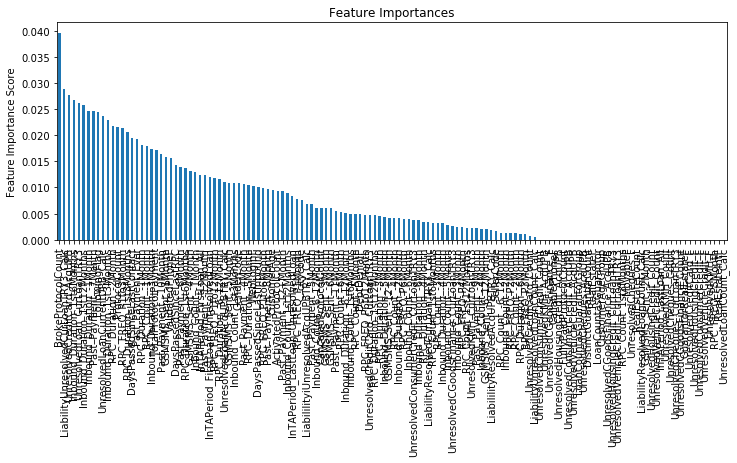

In [19]:
#Choose all predictors except target & IDcols
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, y_train, x_train)

In [20]:
#Choose all predictors except target & IDcols
start = time.time()
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator \
                       = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,
                                                   max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(x_train, y_train)
end = time.time()
print(end - start)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

337.471796989


([mean: 0.76980, std: 0.00632, params: {'n_estimators': 20},
  mean: 0.77208, std: 0.00614, params: {'n_estimators': 30},
  mean: 0.77315, std: 0.00617, params: {'n_estimators': 40},
  mean: 0.77361, std: 0.00610, params: {'n_estimators': 50},
  mean: 0.77360, std: 0.00614, params: {'n_estimators': 60},
  mean: 0.77359, std: 0.00616, params: {'n_estimators': 70},
  mean: 0.77355, std: 0.00617, params: {'n_estimators': 80}],
 {'n_estimators': 50},
 0.7736080062158511)

In [21]:
start = time.time()
param_test2 = {'max_depth':range(5,16,2)}
gsearch2 = GridSearchCV(estimator \
                        = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features='sqrt',
                                                     subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch2.fit(x_train,y_train)
end = time.time()
print(end - start)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

1169.44205904


([mean: 0.77215, std: 0.00629, params: {'max_depth': 5},
  mean: 0.77176, std: 0.00567, params: {'max_depth': 7},
  mean: 0.76687, std: 0.00675, params: {'max_depth': 9},
  mean: 0.75513, std: 0.00703, params: {'max_depth': 11},
  mean: 0.74273, std: 0.00469, params: {'max_depth': 13},
  mean: 0.72606, std: 0.00412, params: {'max_depth': 15}],
 {'max_depth': 5},
 0.7721466610229497)

In [22]:
start = time.time()
param_test3 = {'min_samples_split':range(200,1001,200)}
gsearch3 = GridSearchCV(estimator \
                        = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features='sqrt',
                                                     subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch3.fit(x_train,y_train)
end = time.time()
print(end - start)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

76.8040180206


([mean: 0.76921, std: 0.00642, params: {'min_samples_split': 200},
  mean: 0.76916, std: 0.00627, params: {'min_samples_split': 400},
  mean: 0.76921, std: 0.00641, params: {'min_samples_split': 600},
  mean: 0.76924, std: 0.00602, params: {'min_samples_split': 800},
  mean: 0.76921, std: 0.00606, params: {'min_samples_split': 1000}],
 {'min_samples_split': 800},
 0.7692385997855924)

In [23]:
start = time.time()
param_test4 = {'min_samples_leaf':range(30,71,10)}
gsearch4 = GridSearchCV(estimator \
                        = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=9,
                                                     max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test4, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch4.fit(x_train,y_train)
end = time.time()
print(end - start)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

326.02327013


([mean: 0.77212, std: 0.00699, params: {'min_samples_leaf': 30},
  mean: 0.77022, std: 0.00697, params: {'min_samples_leaf': 40},
  mean: 0.77190, std: 0.00659, params: {'min_samples_leaf': 50},
  mean: 0.77284, std: 0.00664, params: {'min_samples_leaf': 60},
  mean: 0.77247, std: 0.00579, params: {'min_samples_leaf': 70}],
 {'min_samples_leaf': 60},
 0.7728391322393074)

In [24]:
start = time.time()
param_test5 = {'max_features':range(7,20,2)}
gsearch5 = GridSearchCV(estimator \
                        = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                                                     min_samples_split=1200, min_samples_leaf=60, subsample=0.8, 
                                                     random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch5.fit(x_train,y_train)
end = time.time()
print(end - start)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

2442.46489787


([mean: 0.77340, std: 0.00659, params: {'min_samples_leaf': 30},
  mean: 0.77328, std: 0.00644, params: {'min_samples_leaf': 40},
  mean: 0.77276, std: 0.00640, params: {'min_samples_leaf': 50},
  mean: 0.77320, std: 0.00645, params: {'min_samples_leaf': 60},
  mean: 0.77327, std: 0.00551, params: {'min_samples_leaf': 70}],
 {'min_samples_leaf': 30},
 0.7733958893180181)


Model Report
Accuracy: 0.953
AUC Score (Train): 0.786724
CV Score : Mean - 0.7735199 | Std - 0.006356838 | Min - 0.761222 | Max - 0.7792458


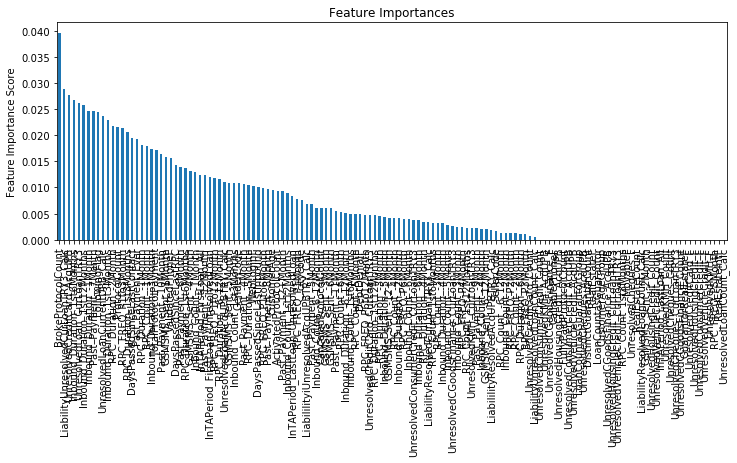

In [25]:
#Choose all predictors except target & IDcols
gbm5 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, min_samples_split=1000,min_samples_leaf=70,
                                                   max_depth=9,max_features='sqrt',subsample=0.8,random_state=10)
modelfit(gbm0, y_train, x_train)

In [26]:
gbm5.fit(x_test, y_test)
y_pred_gbm = gbm5.predict(x_test)
y_pred_proba_gbm = gbm5.predict_proba(x_test)[:,1]
print('Accuracy for Gradient Boosting:')
print(accuracy_score(y_test, y_pred_gbm))
print('Confusion Matrix for Gradient Boosting')
print(confusion_matrix(y_test, y_pred_gbm))
print('F1 Score for Gradient Boosting')
print(f1_score(y_test, y_pred_gbm))
print('AUC Score for Gradient Boosting')
print(roc_auc_score(y_test, y_pred_proba_gbm))

Accuracy for Gradient Boosting:
0.977964315233
Confusion Matrix for Gradient Boosting
[[128965      0]
 [  2906      6]]
F1 Score for Gradient Boosting
0.00411240575737
AUC Score for Gradient Boosting
0.837290017779
